In [813]:
import pandas as pd
import numpy as np
import math
import graphlab as gl
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import csv
%matplotlib inline

In [814]:
df=pd.read_csv('data/CAX_Bidding_TRAIN_Molecule_3_4_5.csv')
df['Start_date'] = pd.to_datetime(df['Start_date'])
col=['ID', 'Account','Molecule','Winning_price_per_standard_unit','Province','Region','Tender_Type', 'Length_of_contract_in_Months', 'Presentation', 'Start_date']
df2=df[col]

In [815]:
df_molecule3_post_loe = df2[(df2['Molecule'] == 'Molecule3') & (df2['Start_date'] > datetime(2009,12,31,0,0,0))]
df_molecule3_pre_loe = df2[(df2['Molecule'] == 'Molecule3') & (df2['Start_date'] <= datetime(2009,12,31,0,0,0))]
df_molecule4_pre_loe = df2[(df2['Molecule'] == 'Molecule4') & (df2['Start_date'] <= datetime(2011,1,31,0,0,0))]
df_molecule4_post_loe = df2[(df2['Molecule'] == 'Molecule4') & (df2['Start_date'] > datetime(2011,1,31,0,0,0))]
df_molecule5_pre_loe = df2[(df2['Molecule'] == 'Molecule5') & (df2['Start_date'] <= datetime(2011,1,31,0,0,0))]
df_molecule5_post_loe = df2[(df2['Molecule'] == 'Molecule5') & (df2['Start_date'] > datetime(2011,1,31,0,0,0))]
#mol3_group_region = df_molecule3.groupby(['Region', 'Presentation'])
#mol3_group_region.get_group(('Region12', 'Presentation10')).sort('Start_date')
#df_molecule3.to_csv('molecule_5_post_loe.csv')

In [816]:
df_molecule3_pre_loe.count().max(), df_molecule3_post_loe.count().max()

(67, 178)

In [817]:
df_molecule4_pre_loe.count().max(), df_molecule4_post_loe.count().max()

(41, 182)

In [818]:
df_molecule5_pre_loe.count().max(), df_molecule5_post_loe.count().max()

(44, 274)

In [826]:
df_molecule3_pre_loe = df_molecule3_pre_loe.dropna()
#cleanup
#df_molecule3_pre_loe = df_molecule3_pre_loe[df_molecule3_pre_loe['ID'] != 208]
#df_molecule3_pre_loe = df_molecule3_pre_loe[df_molecule3_pre_loe['ID'] != 883]
#df_molecule3_pre_loe = df_molecule3_pre_loe[df_molecule3_pre_loe['ID'] != 887]
#df_molecule3_pre_loe = df_molecule3_pre_loe[df_molecule3_pre_loe['ID'] != 891]
#df_molecule3_pre_loe['Region'].unique()
#for region in df_molecule3_pre_loe[df_molecule3_pre_loe['Presentation'] == 'Presentation9']['Region'].unique():
#    presentation9 = df_molecule3_pre_loe[df_molecule3_pre_loe['Region'] == region]
#    print region
#    fig = plt.figure(figsize=(20,10))
#    ax = fig.add_subplot(111)
#    plt.plot(presentation9['Start_date'], presentation9['Winning_price_per_standard_unit'])
df_molecule3_pre_loe[(df_molecule3_pre_loe['Presentation'] == 'Presentation11') & (df_molecule3_pre_loe['Region'] == 'Region3')].sort_values(by='Start_date')

,ID,Account,Molecule,Winning_price_per_standard_unit,Province,Region,Tender_Type,Length_of_contract_in_Months,Presentation,Start_date
194,873,Account56,Molecule3,5.6580,Provice3,Region3,Tender Type1,12,Presentation11,2008-09-18
209,888,Account45,Molecule3,4.0800,Provice3,Region3,Tender Type1,36,Presentation11,2009-01-08
204,883,Account7,Molecule3,5.6585,Provice3,Region3,Tender Type4,3,Presentation11,2009-03-31


Region19
Region8
Region2
Region1
Region5
Region3
Region10
Region14
Region16
Region6
Region12
Region4


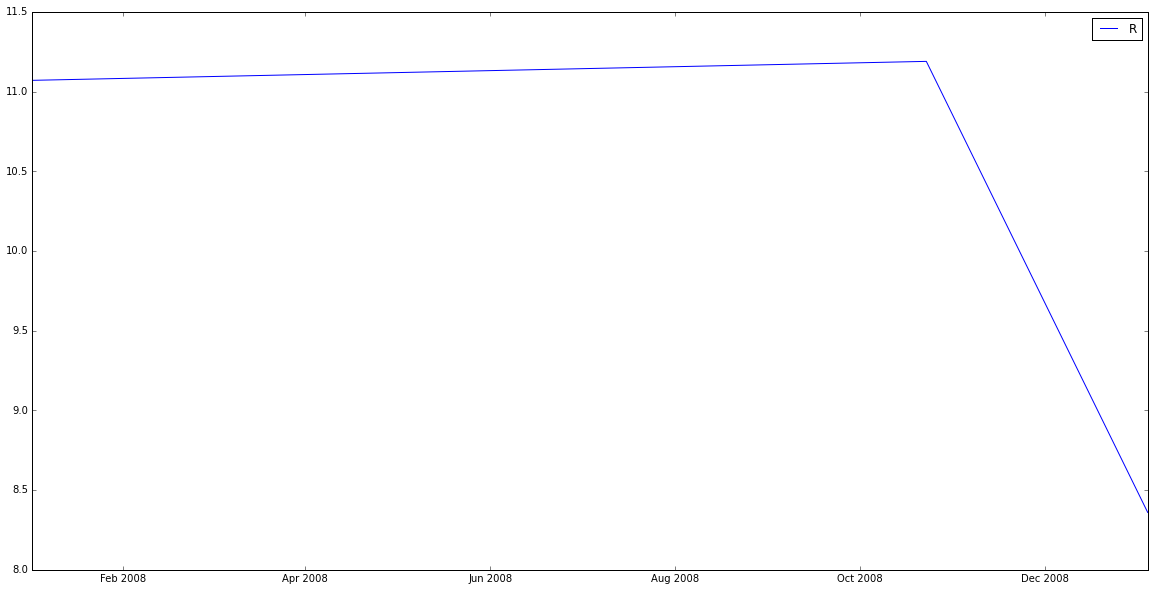

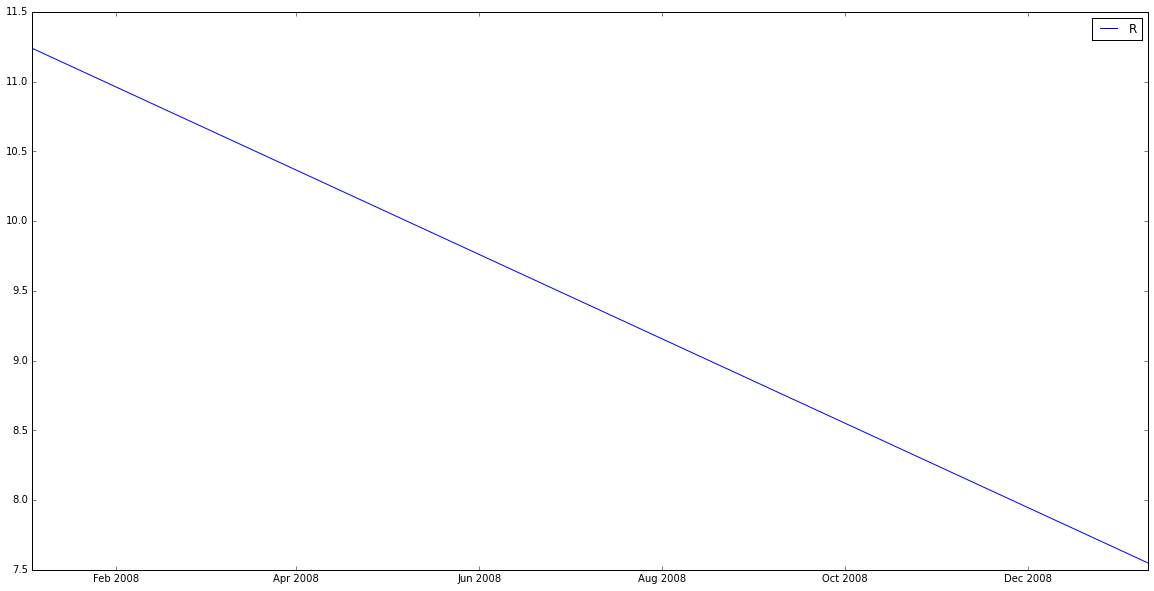

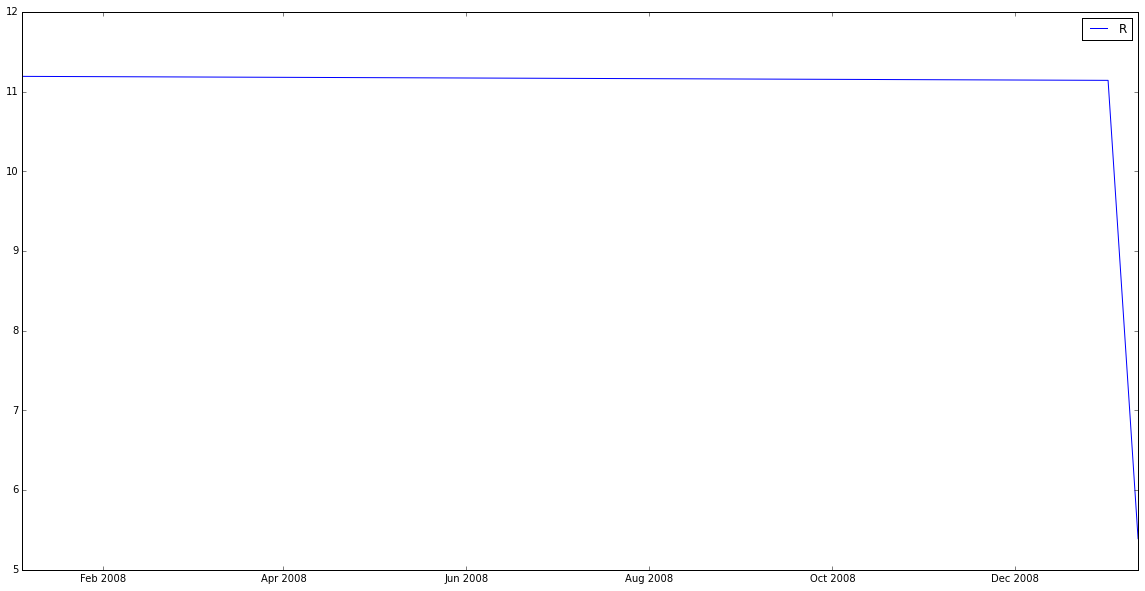

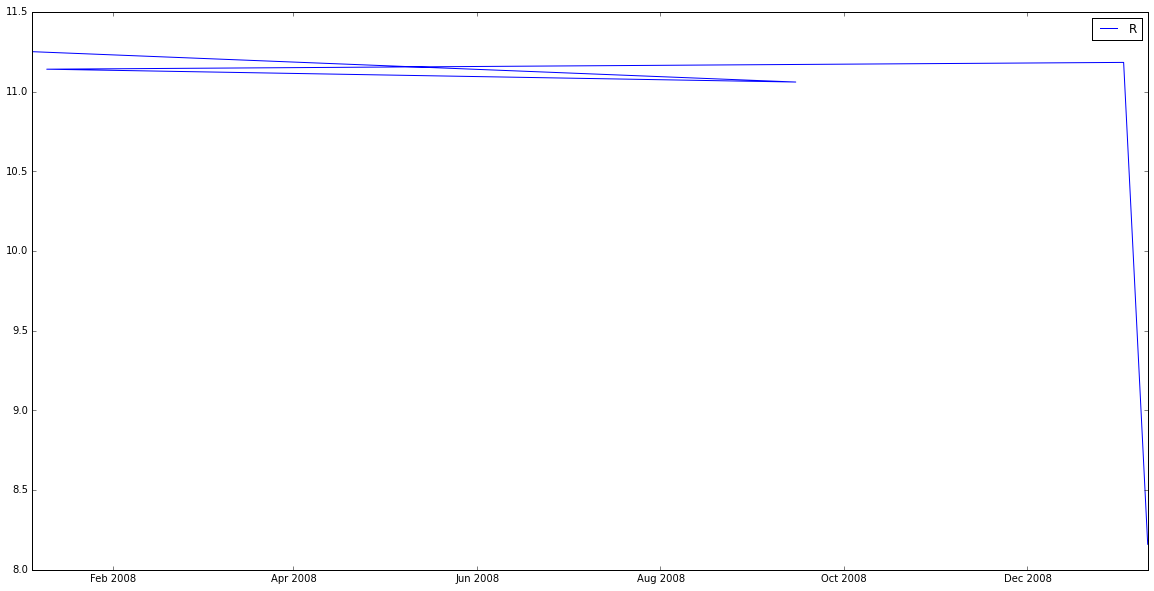

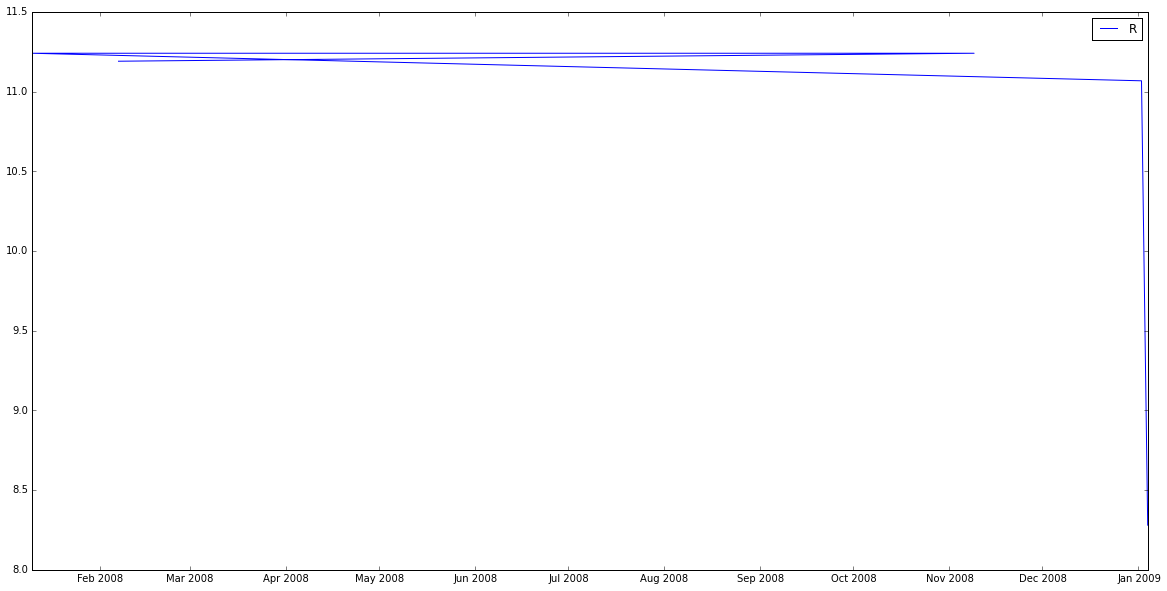

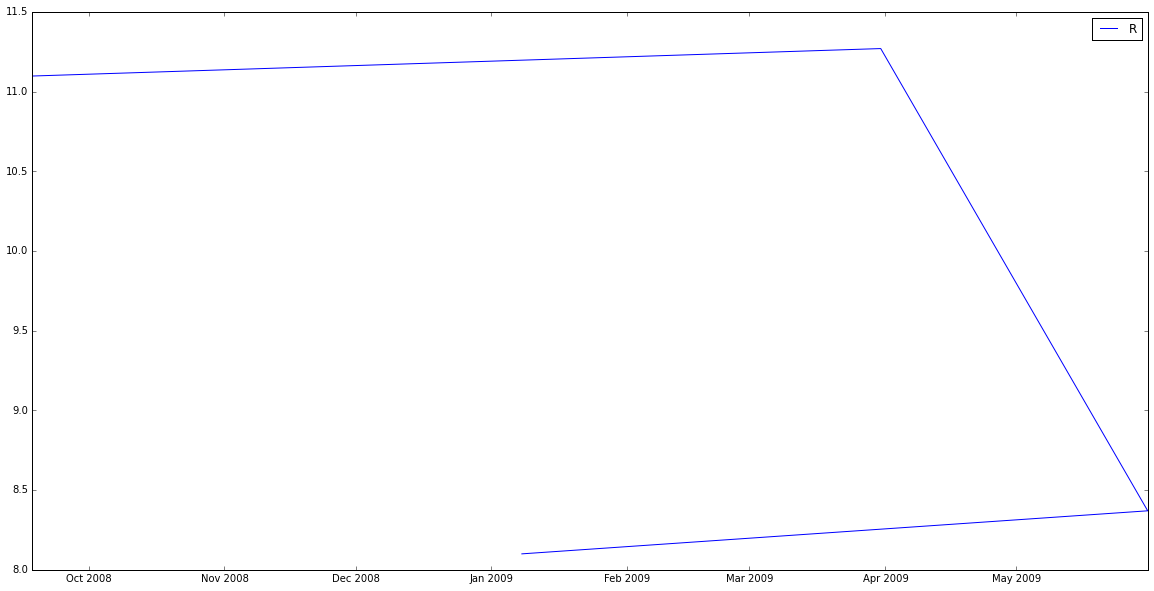

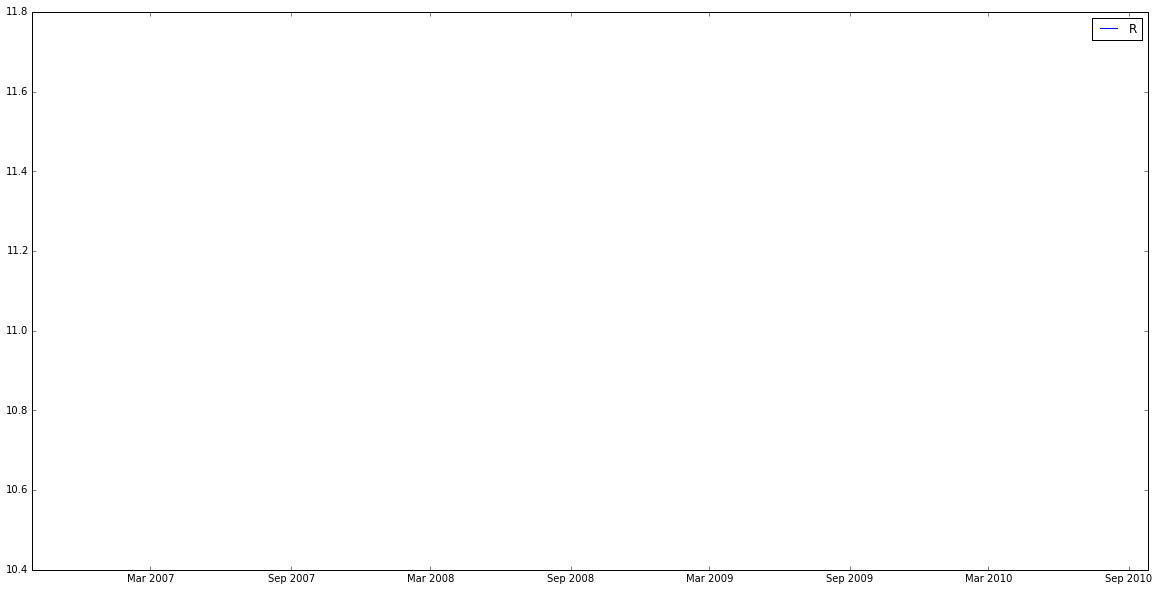

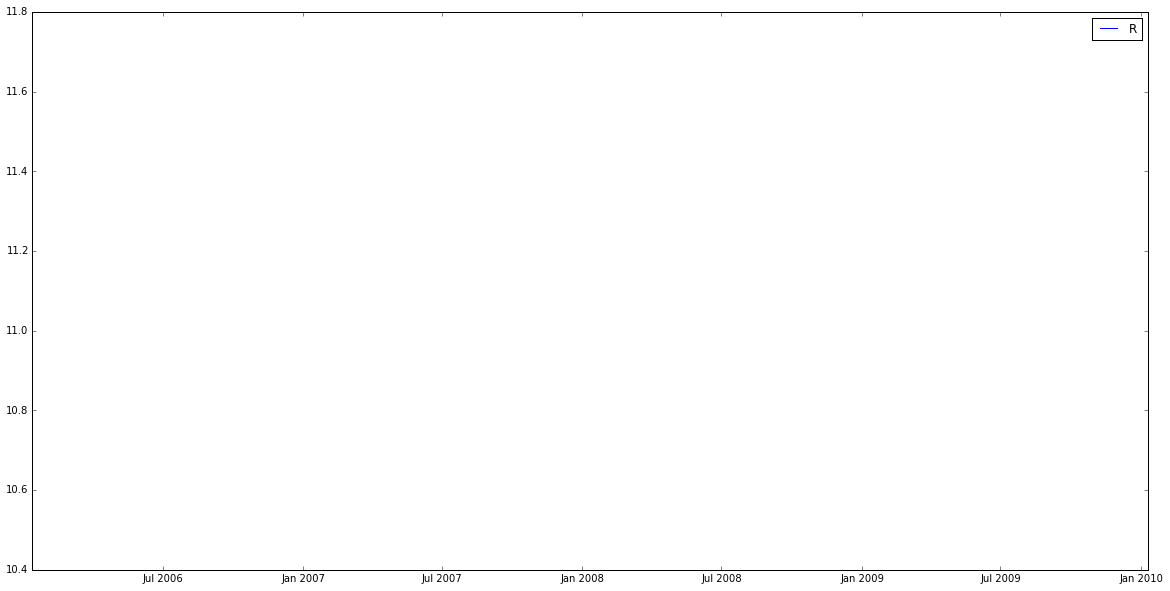

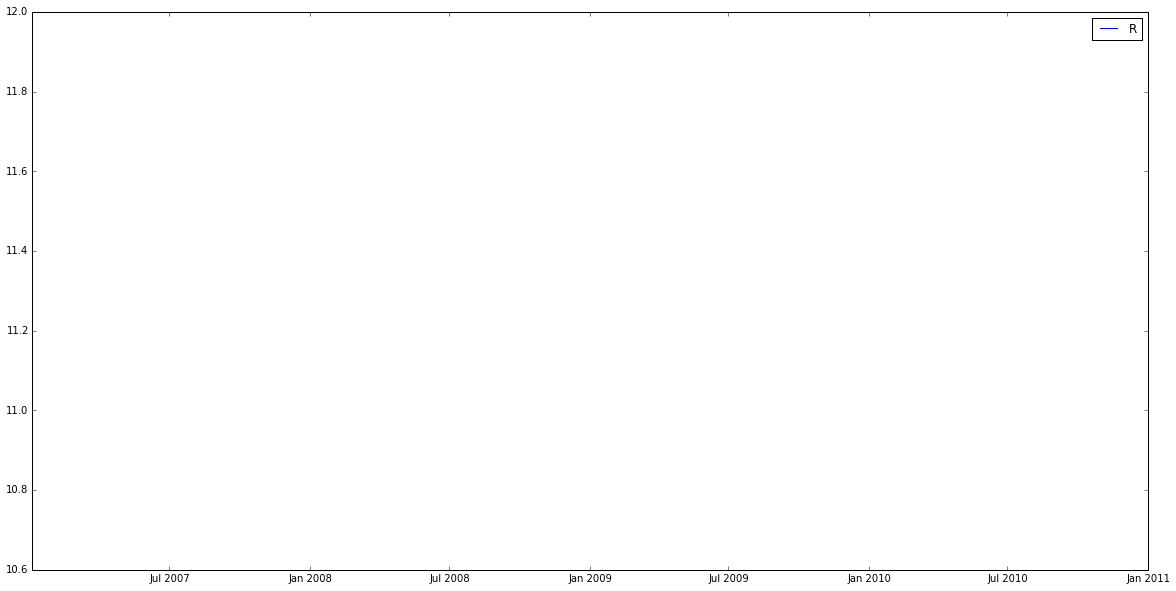

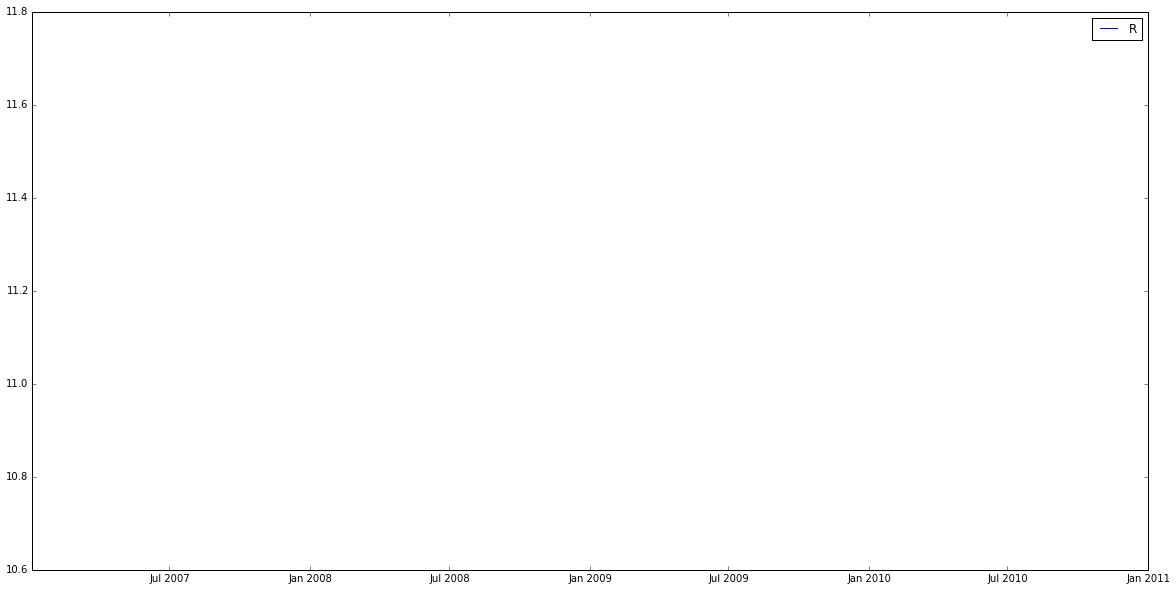

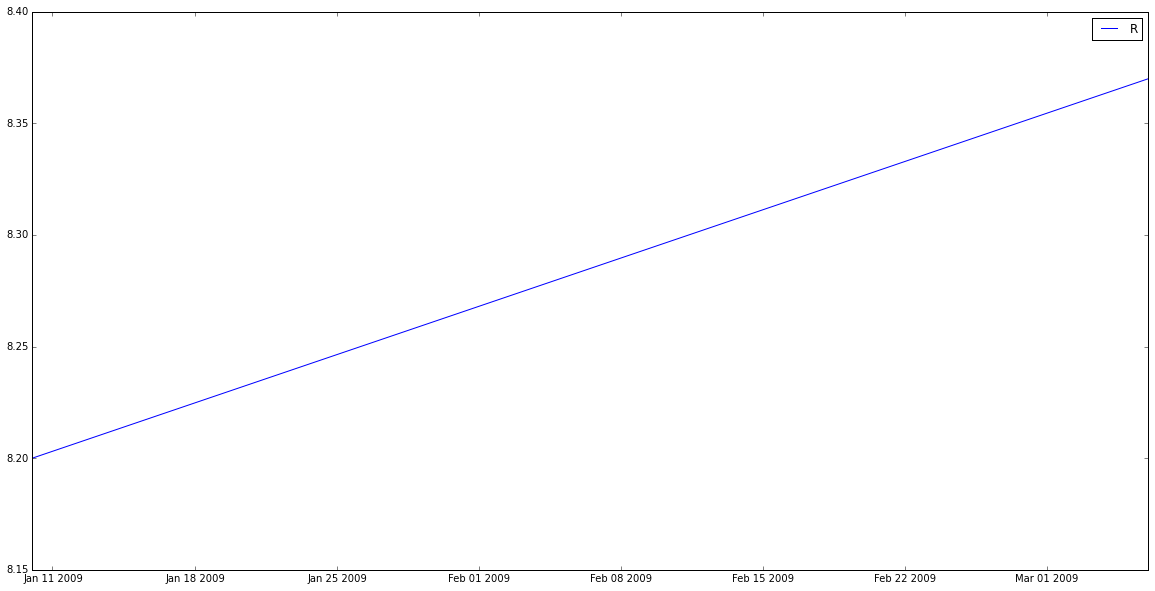

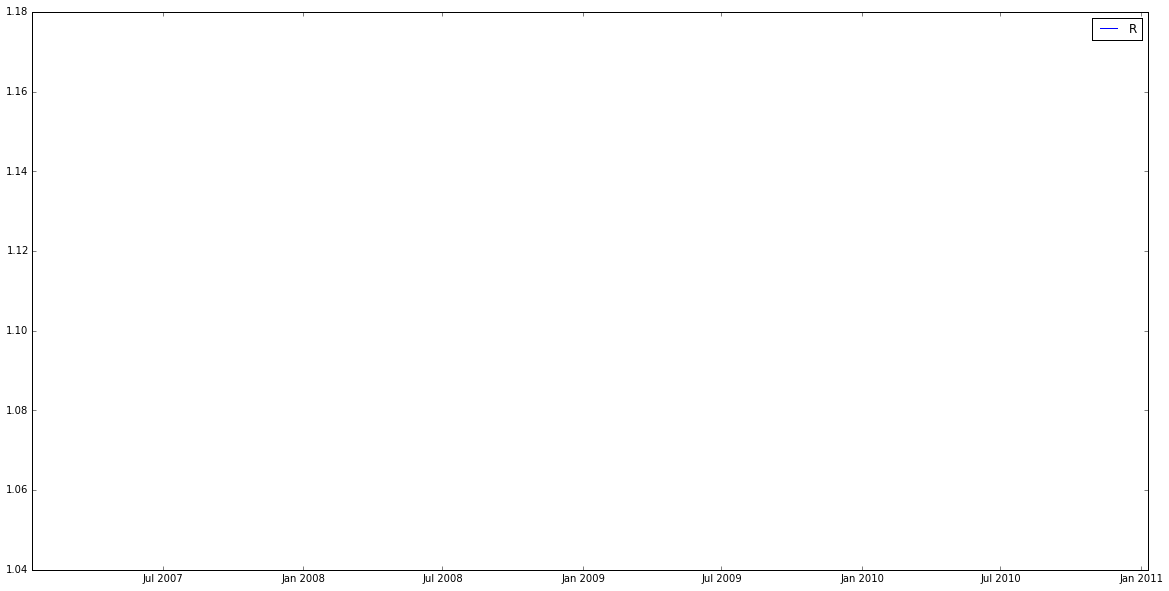

In [824]:
for region in df_molecule3_pre_loe[df_molecule3_pre_loe['Presentation'] == 'Presentation9']['Region'].unique():
    presentation9 = df_molecule3_pre_loe[(df_molecule3_pre_loe['Presentation'] == 'Presentation9') & (df_molecule3_pre_loe['Region'] == region)]
    print region
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    #ax.annotate(presentation9['Winning_price_per_standard_unit'], textcoords='offset points')
    
    plt.plot(presentation9['Start_date'], presentation9['Winning_price_per_standard_unit'])
    plt.legend(region)


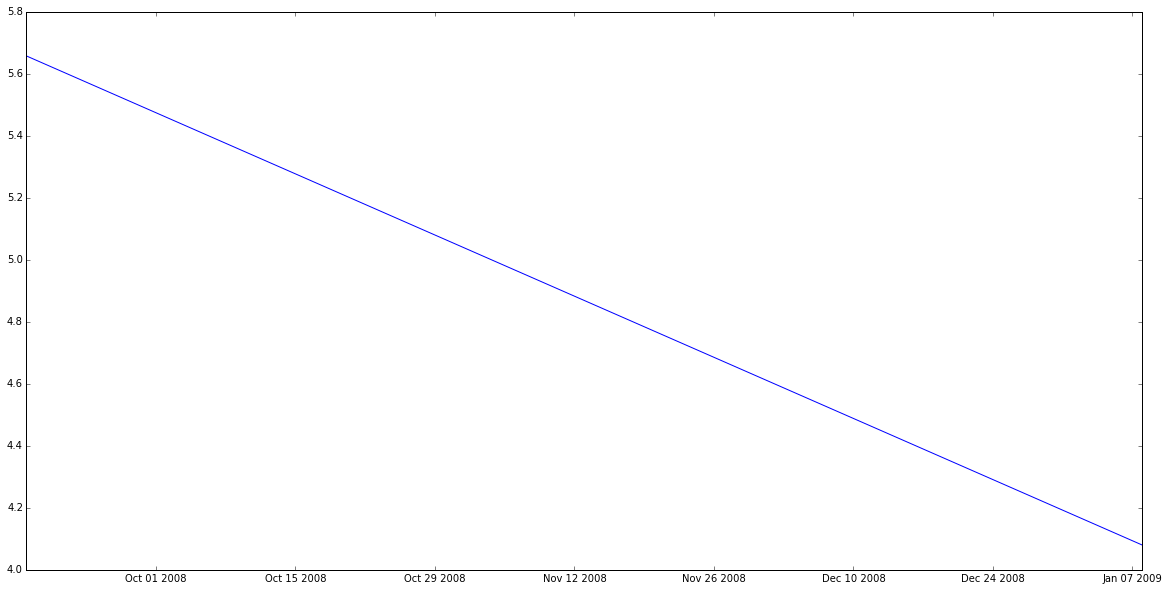

In [783]:
df_molecule3_pre_loe.sort_values(by='Start_date')

presentation9 = df_molecule3_pre_loe[(df_molecule3_pre_loe['Presentation'] == 'Presentation11') & (df_molecule3_pre_loe['Region'] == 'Region3')]
plt.figure(figsize=(20,10))
plt.plot(presentation9['Start_date'], presentation9['Winning_price_per_standard_unit'])

In [759]:
presentation9.sort_values(by='Start_date')

,ID,Account,Molecule,Winning_price_per_standard_unit,Province,Region,Tender_Type,Length_of_contract_in_Months,Presentation,Start_date
186,865,Account89,Molecule3,5.65000,Provice35,Region19,Tender Type1,36,Presentation11,2008-01-02
187,866,Account58,Molecule3,5.65850,Provice1,Region1,Tender Type1,24,Presentation11,2008-01-04
188,867,Account58,Molecule3,5.65850,Provice1,Region1,Tender Type1,24,Presentation11,2008-01-04
189,868,Account16,Molecule3,5.65000,Provice1,Region1,Tender Type4,36,Presentation11,2008-01-05
190,869,Account80,Molecule3,5.65850,Provice24,Region1,Tender Type1,36,Presentation11,2008-01-07
196,875,Account72,Molecule3,5.65900,Provice37,Region5,Tender Type1,36,Presentation11,2008-01-10
198,877,Account71,Molecule3,5.65850,Provice39,Region14,Tender Type1,36,Presentation11,2008-01-11
185,864,Account35,Molecule3,5.65850,Provice51,Region17,Tender Type1,36,Presentation11,2008-01-31
191,870,Account103,Molecule3,5.65850,Provice22,Region5,Tender Type1,36,Presentation11,2008-02-07
193,872,Account5,Molecule3,5.65850,Provice36,Region1,Tender Type1,36,Presentation11,2008-09-15


In [638]:
grouped = df_molecule3_pre_loe.groupby(['Region', 'Presentation'])
k=0
items = []
for (k1,k2),group in mol3_group_region:
    date = mol3_group_region.get_group((k1, k2))['Start_date'].values
    price = mol3_group_region.get_group((k1, k2))['Winning_price_per_standard_unit'].values
    items.append({'date':date,'price':price})
#    plt.scatter(date,price)
    #plt.plot(date,price,label=k2)


In [640]:
df2.dropna()
df2.head()

,Molecule,Winning_price_per_standard_unit,Region,Length_of_contract_in_Months,Presentation,Start_date
0,Molecule3,1.56353,Region6,36,Presentation8,2009-01-01
1,Molecule3,1.56353,Region6,20,Presentation8,2010-01-05
2,Molecule3,1.77000,Region13,24,Presentation8,2010-01-05
3,Molecule3,1.77000,Region9,24,Presentation8,2010-01-07
4,Molecule3,1.50000,Region7,12,Presentation8,2010-01-08


In [642]:
#df2 = df2.drop(df2[df2['Winning_price_per_standard_unit'] == 20.6].index)
#*math.log(row['Tenure']/30,2)

In [643]:
max_presentation = df2['Winning_price_per_standard_unit'].max()

In [644]:
df2=df2.dropna()
df2.head()

,Molecule,Winning_price_per_standard_unit,Region,Length_of_contract_in_Months,Presentation,Start_date
0,Molecule3,1.56353,Region6,36,Presentation8,2009-01-01
1,Molecule3,1.56353,Region6,20,Presentation8,2010-01-05
2,Molecule3,1.77000,Region13,24,Presentation8,2010-01-05
3,Molecule3,1.77000,Region9,24,Presentation8,2010-01-07
4,Molecule3,1.50000,Region7,12,Presentation8,2010-01-08


In [645]:
def days_since_loe(a, b):
    if a=='Molecule3':
        return (b - datetime(2009,1,31,0,0,0)).days
    elif a=='Molecule4':
        return (b - datetime(2011,1,31,0,0,0)).days
    else:
        return (b - datetime(2011,1,31,0,0,0)).days


In [646]:
df2['Tenure'] = df2.apply(lambda row: days_since_loe(row['Molecule'], row['Start_date']), axis=1)

In [647]:
pPresentationDict  = {}
for item in df2['Presentation'].unique():
    row = df2.ix[df2[df2['Presentation'] == item]['Winning_price_per_standard_unit'].idxmax()]
    if row['Tenure'] > 0:
        print row['Tenure'], row['Tenure']
        pPresentationDict[row['Presentation']] = row['Winning_price_per_standard_unit']*row['Tenure']/30
    else:
        pPresentationDict[row['Presentation']] = row['Winning_price_per_standard_unit']

34 34
59 59
344 344


In [583]:
pPresentationDict 

{'Presentation10': 21.672000000000001,
 'Presentation11': 5.6589999999999998,
 'Presentation12': 24.870000000000001,
 'Presentation13': 1.54,
 'Presentation14': 2.7108400000000001,
 'Presentation15': 3.0410699999999999,
 'Presentation16': 1.5203500000000001,
 'Presentation17': 3.0410699999999999,
 'Presentation18': 0.76034999999999997,
 'Presentation19': 1.5203500000000001,
 'Presentation8': 5.5193333333333339,
 'Presentation9': 22.163153333333334}

In [584]:
#pPresentationDict
#df2.head()
#pRegionPresentationDict = {}
#pPresentationDict = {}

#for name, group in grouped_by_presantation:
#    pPresentationDict[name]= (group['Winning_price_per_standard_unit'].max()*group['Tenure'].)/12*-1/max_presentation

#for (k1,k2), group in grouped:
    #price = group['Winning_price_per_standard_unit'].max()
#    price_mean = group['Winning_price_per_standard_unit'].max()
    #print k1+k2
#   pRegionPresentationDict[k1+k2] = price_mean

In [585]:
def factor_presentation(presentation):
    return pPresentationDict[presentation]/max_presentation

In [586]:
factor_presentation('Presentation19')
#doCleanDataNotPresentInPreLoe('Region10','Presentation9')

0.0611318858061922

In [587]:
#df2['Presentation'] = df2.apply(lambda row: np.log(factor_presentation(row['Presentation'])), axis=1)
df2['Presentation'] = df2.apply(lambda row: factor_presentation(row['Presentation']), axis=1)

In [588]:
df2['Length_of_contract_in_Months'] = df2.apply(lambda row: np.log(row['Length_of_contract_in_Months']), axis=1)

In [589]:
df2['Tenure'] = df2.apply(lambda row: row['Tenure'], axis=1)

In [590]:
df2=df2[df2['Tenure'] >= 0]

In [591]:
df2

,Molecule,Winning_price_per_standard_unit,Region,Length_of_contract_in_Months,Presentation,Start_date,Tenure
1,Molecule3,1.563530,Region6,2.995732,0.221927,2010-01-05,339
2,Molecule3,1.770000,Region13,3.178054,0.221927,2010-01-05,339
3,Molecule3,1.770000,Region9,3.178054,0.221927,2010-01-07,341
4,Molecule3,1.500000,Region7,2.484907,0.221927,2010-01-08,342
5,Molecule3,1.450000,Region1,3.583519,0.221927,2010-01-11,345
6,Molecule3,1.812000,Region1,2.484907,0.221927,2010-12-16,684
7,Molecule3,1.310000,Region12,3.178054,0.221927,2011-03-28,786
8,Molecule3,1.294850,Region3,3.583519,0.221927,2011-01-06,705
9,Molecule3,1.540000,Region5,3.583519,0.221927,2011-10-31,1003
10,Molecule3,1.309860,Region6,3.583519,0.221927,2011-01-11,710


In [592]:
df2=df2.drop(['Molecule', 'Start_date', 'Region'],1)

In [593]:
df2=pd.get_dummies(df2)

In [594]:
y=df2.as_matrix()[:,0]

In [595]:
y.shape

(609,)

In [596]:
X=df2.as_matrix()[:,1:]

In [597]:
X.shape

(609, 3)

In [598]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [599]:
df2.columns

Index([u'Winning_price_per_standard_unit', u'Length_of_contract_in_Months',
       u'Presentation', u'Tenure'],
      dtype='object')

In [600]:
#randForest=RandomForestRegressor()
#randForest.fit_transform(X_train,y_train)
#randForest.score(X_test,y_test)
#y_rand_pred=randForest.predict(X_test)
#mean_squared_error(y_test,y_rand_pred)

In [601]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.17734091925502771

In [602]:
reg.coef_

array([  2.19289786e-01,   2.63581724e+00,  -1.01255486e-03])

In [603]:
y_pred=reg.predict(X_test)

In [604]:
#y_pred

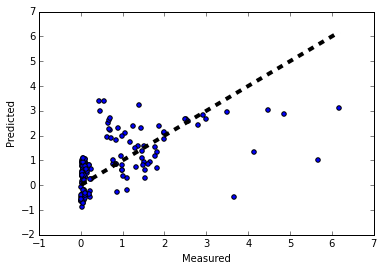

In [605]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [606]:
y_test[0:10]

array([ 0.06   ,  1.99999,  2.8    ,  0.2    ,  0.875  ,  3.65787,
        0.048  ,  3.489  ,  1.812  ,  1.65   ])

In [607]:
y_pred[0:10]

array([ 0.49961179,  1.85086886,  2.43721172,  0.80078097, -0.27680917,
       -0.45864216,  0.49961179,  2.95778179,  0.69247488,  0.93097831])

In [608]:
#plt.scatter(y_pred,y_test)

In [609]:
mean_squared_error(y_test,y_pred)

1.0500660131861239

In [610]:
df_test=pd.read_csv('data/CAX_Bidding_TEST_Molecule_6_Post_LOE.csv')

In [611]:
#df_test.head()

In [612]:
#import csv
#b = open('test.csv', 'w')
#a = csv.writer(b)
#data = ytest_pred
#a.writerow(data)
#b.close()

In [613]:
df_test=pd.read_csv('data/CAX_Bidding_TEST_Molecule_6_Post_LOE.csv')
col_test =['Molecule', 'Region','Length_of_contract_in_Months', 'Presentation', 'Start_date']
df2_test =df_test[col_test]
df2_test['Start_date']=pd.to_datetime(df2_test['Start_date'])

/Users/ssing25/anaconda2/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [614]:
def days_since_loe_test(a, b):
    if a=='Molecule6':
        return (b - datetime(2011,1,1,0,0,0)).days
    else:
        return (b - datetime(2011,1,1,0,0,0)).days
    

In [615]:

df2_test['Tenure'] = df2_test.apply(lambda row: days_since_loe_test(row['Molecule'], row['Start_date']), axis=1)

/Users/ssing25/anaconda2/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [616]:
#df2_test=df2_test[df2_test['Tenure']>0]

#df2_test

df_pres=pd.read_csv('data/CAX_Bidding_TEST_Molecule_6_Pre_LOE.csv')
col_pres =['Molecule', 'Region','Winning_price_per_standard_unit', 'Length_of_contract_in_Months', 'Presentation', 'Start_date']

df_pres = df_pres[col_pres]

In [617]:
df_pres.head()

,Molecule,Region,Winning_price_per_standard_unit,Length_of_contract_in_Months,Presentation,Start_date
0,Molecule6,Region2,19.41545,12,Presentation20,01-01-2010
1,Molecule6,Region9,19.41545,24,Presentation20,01-03-2010
2,Molecule6,Region1,15.92067,36,Presentation20,01-05-2010
3,Molecule6,Region16,19.41000,36,Presentation20,30-07-2010
4,Molecule6,Region6,17.99000,36,Presentation20,01-10-2010


In [618]:
pTestPresentationDict = {}
for item in df_pres['Presentation'].unique():
    row = df_pres.ix[df_pres[df_pres['Presentation'] == item]['Winning_price_per_standard_unit'].idxmax()]
    pTestPresentationDict[row['Presentation']] = row['Winning_price_per_standard_unit']

In [619]:
pTestPresentationDict

{'Presentation20': 19.41545, 'Presentation21': 10.49}

In [620]:
def factor_test_presentation(presentation):
    return pTestPresentationDict[presentation]/max_presentation

In [621]:
#df2_test

In [622]:
df2_test['Presentation'] = df2_test.apply(lambda row: factor_test_presentation(row['Presentation']), axis=1)

/Users/ssing25/anaconda2/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [623]:
df2_test['Tenure'] = df2_test.apply(lambda row: row['Tenure'], axis=1)

/Users/ssing25/anaconda2/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [624]:
df2_test['Length_of_contract_in_Months'] = df2_test.apply(lambda row: np.log(row['Length_of_contract_in_Months']), axis=1)

/Users/ssing25/anaconda2/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [625]:
#df2_test

In [626]:
df3_test = df2_test.drop(['Molecule', 'Start_date', 'Region'], 1)

df3_test.head()

,Length_of_contract_in_Months,Presentation,Tenure
0,1.386294,0.780678,2
1,3.583519,0.780678,2
2,2.708050,0.780678,111
3,2.079442,0.780678,4
4,2.302585,0.780678,4


In [627]:
df3_test=pd.get_dummies(df3_test)

df3_test.head()

,Length_of_contract_in_Months,Presentation,Tenure
0,1.386294,0.780678,2
1,3.583519,0.780678,2
2,2.708050,0.780678,111
3,2.079442,0.780678,4
4,2.302585,0.780678,4


In [628]:
x_test_mtx=df3_test.as_matrix()

In [629]:
y_test_pred=reg.predict(x_test_mtx)

In [630]:
y_test_pred.shape

(152,)

In [631]:
#df2_test.info()

In [632]:
for elem in y_test_pred:
    print elem

2.61488616997
3.09671507768
2.79436524584
2.76486115725
2.8137942589
2.61286106025
3.09468996796
3.06886135126
3.02310591186
2.94067937295
2.94685695854
2.73456653186
3.0936774131
2.73456653186
2.85175040439
2.85175040439
2.34422668372
3.00273794653
3.09165230338
2.52387310081
2.54471254581
2.84871273981
2.79193606511
3.0886146388
2.69019761073
2.69019761073
2.48824321
2.6002620518
2.48824321
2.30103742922
2.67295240138
2.66505936884
2.79021829428
2.56531424743
2.56531424743
2.48520554542
2.36774918177
2.54082246007
2.78616807484
2.78515551998
2.78414296513
2.63113031327
2.72004467012
2.2344224088
2.39158786931
2.47811766141
2.2928201222
2.26863567373
2.20465424687
2.30793484249
2.11562302187
2.26844520299
2.41759810616
2.21781746004
2.35349981115
2.11168967058
1.62846726654
1.9889800619
1.74806560805
2.00042550424
1.64876162927
1.98492984246
1.74919503105
1.7986197484
1.51922820991
1.51922820991
1.89196526618
1.98087962303
1.61974363207
1.88994015646
1.54465894953
1.3784830845
1.28120